## Practical Activity 2.2.8

### 1. Prepare your workstation

In [1]:
# Import all the necessary packages.
import numpy as np
import pandas as pd

### 2. Import the data set

In [2]:
# Import the data set.
df = pd.read_csv('breast_cancer_data.csv', 
                 index_col = 'id')

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 569 entries, 842302 to 92751
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se            

In [3]:
# Determine null values.
df.isnull().sum()

diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed: 32                569
dtype: i

In [4]:
# Descriptive statistics.
df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [5]:
# Drop null values.
df.drop(labels = 'Unnamed: 32', axis = 1, inplace = True)

In [6]:
# Determine if data set is balanced.
df['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

### 3. Create a random forest model

In [7]:
# Import necessary packages.
import imblearn
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import warnings
warnings.filterwarnings("ignore")

In [8]:
# Divide data into attributes and labels.
X = df.iloc[:, 0:4].values
y = df.iloc[:, 4].values

In [9]:
# Specify the variables.
target_col = 'diagnosis'
feature_cols = [c for c in df.columns if c != target_col]

X = df[feature_cols]
y = df[target_col]

In [10]:
# Split the data set into train and test subsets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30,
                                                    random_state = 1)

In [11]:
# Import 'RandomForestClassifier' package.
from sklearn.ensemble import RandomForestClassifier

# Create a variable to store the classifier:
forest = RandomForestClassifier(n_estimators = 200, criterion = 'gini', 
                                min_samples_split = 2, min_samples_leaf = 2, 
                                max_features = 'auto', bootstrap = True,
                                n_jobs = -1, random_state = 42)

# Train the model with the train subset.
forest.fit(X_train, y_train)

# Predict the response for the test subset.
y_pred = forest.predict(X_test)

### 4. Calculate/Check accuracy of model

In [12]:
# Import necessary packages.
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Print the confusion matrix.
print(confusion_matrix(y_test,y_pred))
# Print the classification report.
print(classification_report(y_test,y_pred))
# Print the accuracy score.
print(accuracy_score(y_test, y_pred))

[[105   3]
 [  5  58]]
              precision    recall  f1-score   support

           B       0.95      0.97      0.96       108
           M       0.95      0.92      0.94        63

    accuracy                           0.95       171
   macro avg       0.95      0.95      0.95       171
weighted avg       0.95      0.95      0.95       171

0.9532163742690059


### 5. Visualise the random forest model

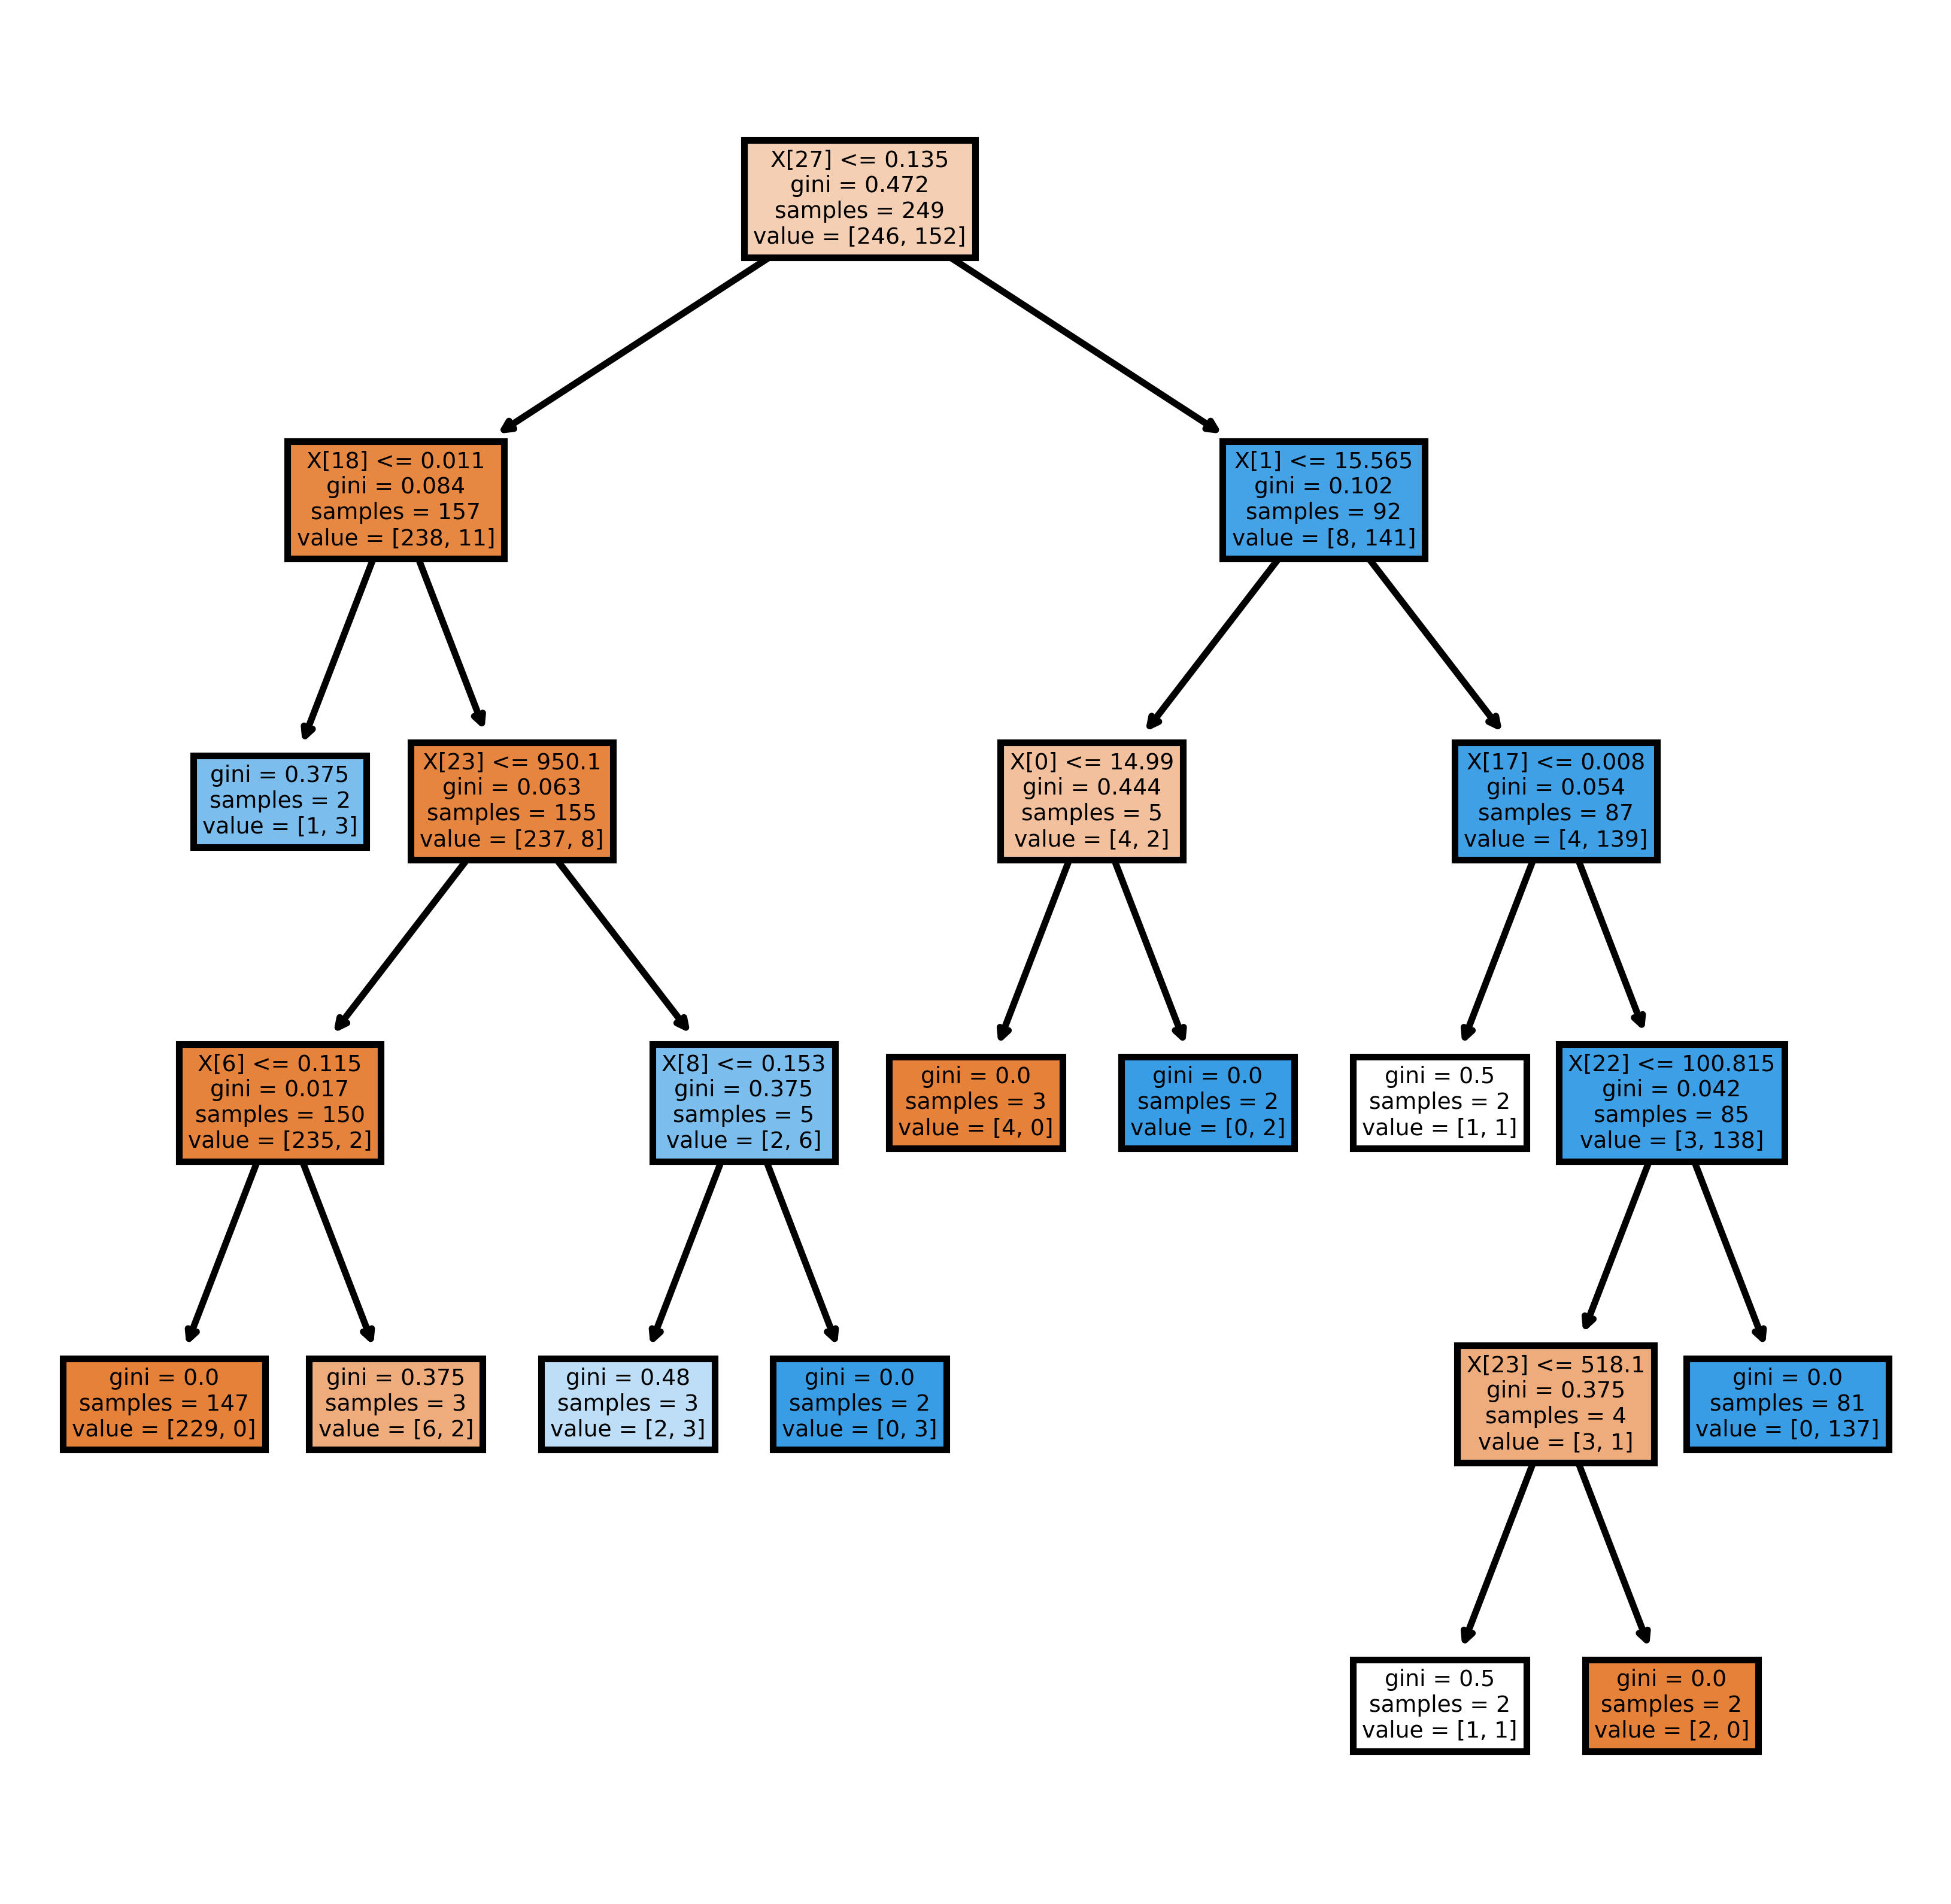

In [15]:
# Import necessary packages.
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.tree import export_graphviz

# Plot the visualisation:
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (5, 5), dpi = 800)
tree.plot_tree(forest.estimators_[0], filled = True)

plt.show()